## CMSC 25025
## Homework 4
## Problem 1
## Ruben Abbou

In [2]:
import tensorflow as tf, time, matplotlib.pyplot as plt, numpy as np
from tensorflow import keras

/software/Anaconda3-5.0.1-el7-x86_64/envs/DL_GPU_cuda_9.0/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
def one_hot(values,n_values=10):
    n_v= np.maximum(n_values,np.max(values) + 1)
    oh = np.eye(n_v)[values]
    return oh

X = np.load('/project2/cmsc25025/mnist/MNIST.npy').reshape(-1,28,28,1).astype(np.float64) / 255.
Y = one_hot(np.load('/project2/cmsc25025/mnist/MNIST_labels.npy'))
L = 70000
train_set = (X[:int(5/7*L)], Y[:int(5/7*L)])
val_set = (X[int(5/7*L):int(6/7*L)], Y[int(5/7*L):int(6/7*L)])
test_set = (X[int(6/7*L):L], Y[int(6/7*L):L])


## (a)

In [51]:
def fit_model(f):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer((28,28,1)))
    for i in range(len(f)): # add layers
        model.add(keras.layers.Conv2D(filters=f[i], kernel_size=(5,5),
                                      padding='same', activation='relu'))
        model.add(keras.layers.MaxPool2D())
        model.add(keras.layers.Dropout(rate=0.4))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(units=1024, activation='relu'))
    model.add(keras.layers.Dense(units=10, activation='softmax'))
    model.compile(optimizer=tf.train.AdadeltaOptimizer(0.1),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    return model

In [27]:
model = fit_model([32, 64])
ep = 20
fit = model.fit(x=train_set[0], y=train_set[1],
        epochs=ep, batch_size=250,
        shuffle=True,validation_data=val_set)
# results = model.evaluate(test_set[0], test_set[1])
train_errors = 1-np.array(fit.history.get('acc'))
val_errors = 1-np.array(fit.history.get('val_acc'))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 9s 171us/step - loss: 1.1585 - acc: 0.6742 - val_loss: 0.3649 - val_acc: 0.9015
Epoch 2/20
50000/50000 [==============================] - 5s 102us/step - loss: 0.3978 - acc: 0.8798 - val_loss: 0.2478 - val_acc: 0.9295
Epoch 3/20
50000/50000 [==============================] - 5s 103us/step - loss: 0.2961 - acc: 0.9111 - val_loss: 0.1880 - val_acc: 0.9455
Epoch 4/20
50000/50000 [==============================] - 5s 103us/step - loss: 0.2395 - acc: 0.9303 - val_loss: 0.1546 - val_acc: 0.9542
Epoch 5/20
50000/50000 [==============================] - 5s 103us/step - loss: 0.2008 - acc: 0.9400 - val_loss: 0.1325 - val_acc: 0.9601
Epoch 6/20
50000/50000 [==============================] - 5s 103us/step - loss: 0.1771 - acc: 0.9464 - val_loss: 0.1115 - val_acc: 0.9656
Epoch 7/20
50000/50000 [==============================] - 5s 103us/step - loss: 0.1581 - acc: 0.9530 - val_loss: 0.1042 - 

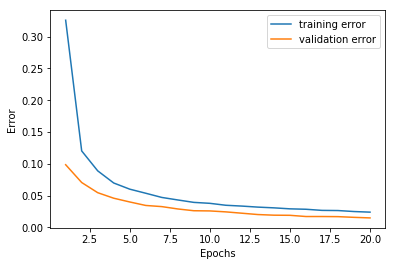

In [28]:
plt.plot(range(1,ep+1), train_errors, label = 'training error')
plt.plot(range(1,ep+1), val_errors, label = 'validation error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()

In [6]:
def plot_images(layer, nrows, ncols):
    plt.figure(figsize=(ncols, nrows))
    for i in range(nrows*ncols):
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(layer[i][0], cmap='gray')
        plt.axis('off')
    plt.axis('off')
    plt.show()

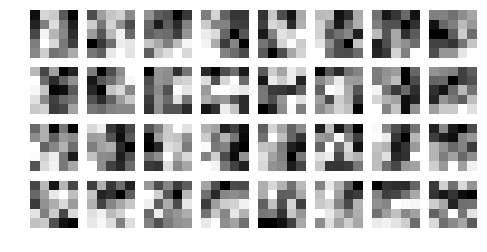

In [8]:
plot_images(model.layers[0].get_weights()[0].T, 4, 8)

## (b)
### i. Modify parameter numbers

In [30]:
filters = [(2**i, 2**(i+1)) for i in range(4, 8)]
error_per_filter = []

for f in filters:
    print('\nLayers %d and' %f[0], '%d'%f[1])
    model = fit_model(f)
    model.fit(x=train_set[0][:10000], y=train_set[1][:10000],
              epochs=5, batch_size=250, shuffle=True,
              validation_data=val_set)
    error_per_filter.append(1-model.evaluate(test_set[0], test_set[1])[1])


Layers 16 and 32
Train on 10000 samples, validate on 10000 samples
Epoch 1/5
10000/10000 [==============================] - 4s 417us/step - loss: 2.2175 - acc: 0.2537 - val_loss: 2.1026 - val_acc: 0.6042
Epoch 2/5
10000/10000 [==============================] - 1s 76us/step - loss: 1.8892 - acc: 0.5346 - val_loss: 1.5312 - val_acc: 0.7138
Epoch 3/5
10000/10000 [==============================] - 1s 76us/step - loss: 1.2429 - acc: 0.6824 - val_loss: 0.8429 - val_acc: 0.7981
Epoch 4/5
10000/10000 [==============================] - 1s 76us/step - loss: 0.8332 - acc: 0.7498 - val_loss: 0.5898 - val_acc: 0.8511
Epoch 5/5
10000/10000 [==============================] - 1s 65us/step

Layers 32 and 64
Train on 10000 samples, validate on 10000 samples
Epoch 1/5
10000/10000 [==============================] - 5s 485us/step - loss: 2.1858 - acc: 0.3278 - val_loss: 1.9937 - val_acc: 0.6691
Epoch 2/5
10000/10000 [==============================] - 1s 123us/step - loss: 1.5951 - acc: 0.6417 - val_loss: 

In [31]:
print(error_per_filter)

[0.12070000000000003, 0.10050000000000003, 0.09309999999999996, 0.08509999999999995]


Therefore, quadrupling the number parameters has a better error rate after 5 epochs.

### ii. Modify depth

In [22]:
depths = [[32, 64], [32, 64, 32], [32, 64, 64], [32, 64, 32, 64], [32, 32, 64, 64]]
error_per_depth = []

for f in depths:
    print('\n%d Layers :'% len(f), f)
    model = fit_model(f)
    model.fit(x=train_set[0], y=train_set[1],
              epochs=20, batch_size=250, shuffle=True,
              validation_data=val_set)
    error_per_depth.append(1-model.evaluate(test_set[0], test_set[1])[1])


2 Layers 
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 8s 162us/step - loss: 1.1602 - acc: 0.6696 - val_loss: 0.3757 - val_acc: 0.8975
Epoch 2/20
50000/50000 [==============================] - 5s 102us/step - loss: 0.3938 - acc: 0.8808 - val_loss: 0.2396 - val_acc: 0.9336
Epoch 3/20
50000/50000 [==============================] - 5s 105us/step - loss: 0.2848 - acc: 0.9160 - val_loss: 0.1856 - val_acc: 0.9453
Epoch 4/20
50000/50000 [==============================] - 5s 103us/step - loss: 0.2281 - acc: 0.9325 - val_loss: 0.1504 - val_acc: 0.9539
Epoch 5/20
50000/50000 [==============================] - 5s 105us/step - loss: 0.1932 - acc: 0.9415 - val_loss: 0.1281 - val_acc: 0.9602
Epoch 6/20
50000/50000 [==============================] - 5s 103us/step - loss: 0.1685 - acc: 0.9496 - val_loss: 0.1096 - val_acc: 0.9661
Epoch 7/20
50000/50000 [==============================] - 5s 103us/step - loss: 0.1521 - acc: 0.9542 - val_loss

Epoch 18/20
50000/50000 [==============================] - 6s 116us/step - loss: 0.1298 - acc: 0.9600 - val_loss: 0.0615 - val_acc: 0.9790
Epoch 19/20
50000/50000 [==============================] - 6s 116us/step - loss: 0.1286 - acc: 0.9610 - val_loss: 0.0600 - val_acc: 0.9800
Epoch 20/20
10000/10000 [==============================] - 1s 84us/step

4 Layers 
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 8s 167us/step - loss: 2.2958 - acc: 0.1081 - val_loss: 2.2824 - val_acc: 0.1327
Epoch 2/20
50000/50000 [==============================] - 5s 109us/step - loss: 2.1625 - acc: 0.2062 - val_loss: 1.4276 - val_acc: 0.5967
Epoch 3/20
50000/50000 [==============================] - 5s 110us/step - loss: 1.2473 - acc: 0.5788 - val_loss: 0.6915 - val_acc: 0.7882
Epoch 4/20
50000/50000 [==============================] - 6s 111us/step - loss: 0.8563 - acc: 0.7175 - val_loss: 0.4556 - val_acc: 0.8720
Epoch 5/20
50000/50000 [=============

In [23]:
error_per_depth

[0.015900000000000025,
 0.022499999999999964,
 0.01959999999999995,
 0.03520000000000001]

The model with 3 layers 32, 64, 64 did better than the others, when testing it on the test set.

### iii. final model

In [33]:
model = fit_model([128,256,256])
model.fit(x=train_set[0], y=train_set[1],
          epochs=20, batch_size=250, shuffle=True,
          validation_data=val_set)
final_test_error = 1-model.evaluate(test_set[0], test_set[1])[1]

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 28s 555us/step - loss: 1.2547 - acc: 0.5913 - val_loss: 0.3273 - val_acc: 0.9064
Epoch 2/20
50000/50000 [==============================] - 23s 460us/step - loss: 0.3146 - acc: 0.9041 - val_loss: 0.1584 - val_acc: 0.9516
Epoch 3/20
50000/50000 [==============================] - 23s 460us/step - loss: 0.2021 - acc: 0.9384 - val_loss: 0.1130 - val_acc: 0.9625
Epoch 4/20
50000/50000 [==============================] - 23s 460us/step - loss: 0.1535 - acc: 0.9524 - val_loss: 0.0932 - val_acc: 0.9706
Epoch 5/20
50000/50000 [==============================] - 23s 462us/step - loss: 0.1313 - acc: 0.9599 - val_loss: 0.0733 - val_acc: 0.9764
Epoch 6/20
50000/50000 [==============================] - 23s 461us/step - loss: 0.1145 - acc: 0.9637 - val_loss: 0.0651 - val_acc: 0.9785
Epoch 7/20
50000/50000 [==============================] - 23s 460us/step - loss: 0.1021 - acc: 0.9690 - val_loss: 0.

In [39]:
print("Error running our best model on the testing set: %.3f%%" % (final_test_error*100))

Error running our best model on the testing set: 1.120%


## (c)

In [4]:
X_trans= np.load('/project2/cmsc25025/mnist/MNIST_TEST_TRANS.npy').reshape(-1,28,28,1).astype(np.float64) / 255.
L = 70000
train_sett = (X_trans[:int(5/7*L)], Y[:int(5/7*L)])
val_sett = (X_trans[int(5/7*L):int(6/7*L)], Y[int(5/7*L):int(6/7*L)])
test_sett = (X_trans[int(6/7*L):L], Y[int(6/7*L):L])

In [55]:
def plot_digits(means, nrows, ncols):
    plt.figure(figsize=(ncols, nrows))
    for i in range(nrows*ncols):
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(means.T[i].reshape((28,28)), cmap='gray')
        plt.axis('off')
    plt.axis('off')
    plt.show()

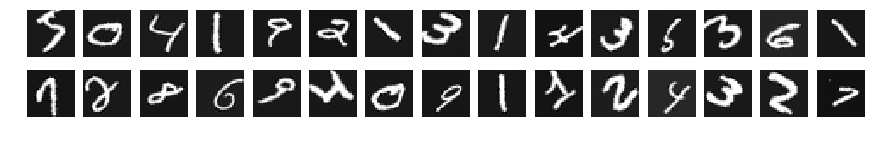

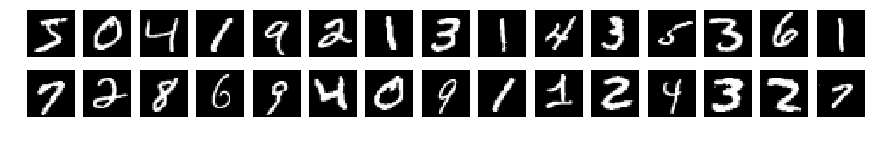

In [58]:
X_trans_plot= np.load('/project2/cmsc25025/mnist/MNIST_TEST_TRANS.npy')[:30].astype(np.float64) / 255.
X_plot= np.load('/project2/cmsc25025/mnist/MNIST.npy')[:30].astype(np.float64) / 255.
plot_digits(X_trans_plot.T, 2, 15)
plot_digits(X_plot.T,2, 15)

In [6]:
model = fit_model([32, 64])
model.fit(x=train_set[0], y=train_set[1],
          epochs=10, batch_size=500, shuffle=True,
          validation_data=val_sett)
testt_error = 1-model.evaluate(test_sett[0], test_sett[1])[1]

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 5s 106us/step - loss: 1.6170 - acc: 0.5337 - val_loss: 2.2977 - val_acc: 0.1507
Epoch 2/10
50000/50000 [==============================] - 4s 85us/step - loss: 0.6142 - acc: 0.8045 - val_loss: 2.2973 - val_acc: 0.1444
Epoch 3/10
50000/50000 [==============================] - 4s 86us/step - loss: 0.4286 - acc: 0.8680 - val_loss: 2.2984 - val_acc: 0.1611
Epoch 4/10
50000/50000 [==============================] - 4s 85us/step - loss: 0.3503 - acc: 0.8930 - val_loss: 2.2994 - val_acc: 0.0920
Epoch 5/10
50000/50000 [==============================] - 4s 84us/step - loss: 0.2985 - acc: 0.9084 - val_loss: 2.2998 - val_acc: 0.0892
Epoch 6/10
50000/50000 [==============================] - 4s 85us/step - loss: 0.2610 - acc: 0.9213 - val_loss: 2.3003 - val_acc: 0.0892
Epoch 7/10
50000/50000 [==============================] - 4s 85us/step - loss: 0.2267 - acc: 0.9311 - val_loss: 2.3003 - val_ac

In [7]:
print("Error running the original network on transformed data: %.3f%%" % (testt_error*100))

Error running the original network on transformed data: 90.850%


Indeed, we obtained a very bad error rate here. Let's change the dropout rate.

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer((28,28,1)))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(5,5),
                              padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(5,5),
                              padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=1024, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))
model.compile(optimizer=tf.train.AdadeltaOptimizer(0.1),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

model.fit(x=train_set[0], y=train_set[1],
          epochs=10, batch_size=500, shuffle=True,
          validation_data=val_sett)
testt_error = 1-model.evaluate(test_sett[0], test_sett[1])[1]

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 6s 111us/step - loss: 0.5692 - acc: 0.8290 - val_loss: 2.2968 - val_acc: 0.1154
Epoch 2/10
50000/50000 [==============================] - 4s 86us/step - loss: 0.1268 - acc: 0.9616 - val_loss: 2.2948 - val_acc: 0.2402
Epoch 3/10
50000/50000 [==============================] - 4s 86us/step - loss: 0.0828 - acc: 0.9747 - val_loss: 2.2942 - val_acc: 0.2451
Epoch 4/10
50000/50000 [==============================] - 4s 86us/step - loss: 0.0635 - acc: 0.9803 - val_loss: 2.2938 - val_acc: 0.1621
Epoch 5/10
50000/50000 [==============================] - 4s 87us/step - loss: 0.0538 - acc: 0.9827 - val_loss: 2.2948 - val_acc: 0.1687
Epoch 6/10
50000/50000 [==============================] - 4s 87us/step - loss: 0.0448 - acc: 0.9863 - val_loss: 2.2949 - val_acc: 0.1253
Epoch 7/10
50000/50000 [==============================] - 4s 86us/step - loss: 0.0387 - acc: 0.9882 - val_loss: 2.2952 - val_ac

In [20]:
print("New error: %.3f%%" % (testt_error*100))

New error: 87.380%


In [77]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer((28,28,1)))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(5,5),
                              padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(5,5),
                              padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=1024, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(keras.layers.Dense(units=10, activation='softmax'))
model.compile(optimizer=tf.train.AdadeltaOptimizer(),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

model.fit(x=train_set[0], y=train_set[1],
          epochs=10, batch_size=500, shuffle=True,
          validation_data=val_sett)
testt_error = 1-model.evaluate(test_sett[0], test_sett[1])[1]

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 10s 200us/step - loss: 3.8375 - acc: 0.1144 - val_loss: 3.8446 - val_acc: 0.1904
Epoch 2/10
50000/50000 [==============================] - 4s 86us/step - loss: 3.8296 - acc: 0.1273 - val_loss: 3.8440 - val_acc: 0.1988
Epoch 3/10
50000/50000 [==============================] - 4s 87us/step - loss: 3.8208 - acc: 0.1548 - val_loss: 3.8435 - val_acc: 0.1704
Epoch 4/10
50000/50000 [==============================] - 4s 87us/step - loss: 3.8124 - acc: 0.1788 - val_loss: 3.8429 - val_acc: 0.1536
Epoch 5/10
50000/50000 [==============================] - 4s 87us/step - loss: 3.8035 - acc: 0.2032 - val_loss: 3.8423 - val_acc: 0.1547
Epoch 6/10
50000/50000 [==============================] - 4s 87us/step - loss: 3.7953 - acc: 0.2249 - val_loss: 3.8417 - val_acc: 0.1622
Epoch 7/10
50000/50000 [==============================] - 4s 87us/step - loss: 3.7861 - acc: 0.2497 - val_loss: 3.8411 - val_a

In [78]:
print("New error: %.3f%%" % (testt_error*100))

New error: 82.240%


In [7]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer((28,28,1)))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(5,5),
                              padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=1024, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(keras.layers.Dense(units=10, activation='softmax'))
model.compile(optimizer=tf.train.AdadeltaOptimizer(),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

model.fit(x=train_set[0], y=train_set[1],
          epochs=10, batch_size=500, shuffle=True,
          validation_data=val_sett)
testt_error = 1-model.evaluate(test_sett[0], test_sett[1])[1]

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 6s 116us/step - loss: 4.0728 - acc: 0.1075 - val_loss: 4.0633 - val_acc: 0.1210
Epoch 2/10
50000/50000 [==============================] - 3s 58us/step - loss: 4.0561 - acc: 0.1352 - val_loss: 4.0627 - val_acc: 0.1756
Epoch 3/10
50000/50000 [==============================] - 3s 59us/step - loss: 4.0393 - acc: 0.1682 - val_loss: 4.0620 - val_acc: 0.2043
Epoch 4/10
50000/50000 [==============================] - 3s 60us/step - loss: 4.0220 - acc: 0.2148 - val_loss: 4.0613 - val_acc: 0.2175
Epoch 5/10
50000/50000 [==============================] - 3s 59us/step - loss: 4.0043 - acc: 0.2698 - val_loss: 4.0606 - val_acc: 0.2232
Epoch 6/10
50000/50000 [==============================] - 3s 59us/step - loss: 3.9866 - acc: 0.3336 - val_loss: 4.0599 - val_acc: 0.2292
Epoch 7/10
50000/50000 [==============================] - 3s 60us/step - loss: 3.9684 - acc: 0.3967 - val_loss: 4.0593 - val_ac

In [8]:
print("New error: %.3f%%" % (testt_error*100))

New error: 77.660%


In [21]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer((28,28,1)))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(5,5),
                              padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Dropout(rate=0.6))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=1024, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(keras.layers.Dense(units=10, activation='softmax'))
model.compile(optimizer=tf.train.AdadeltaOptimizer(),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

model.fit(x=train_set[0], y=train_set[1],
          epochs=10, batch_size=500, shuffle=True,
          validation_data=val_sett)
testt_error = 1-model.evaluate(test_sett[0], test_sett[1])[1]

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 6s 126us/step - loss: 4.0602 - acc: 0.1125 - val_loss: 4.0623 - val_acc: 0.1383
Epoch 2/10
50000/50000 [==============================] - 3s 59us/step - loss: 4.0452 - acc: 0.1281 - val_loss: 4.0616 - val_acc: 0.2000
Epoch 3/10
50000/50000 [==============================] - 3s 60us/step - loss: 4.0294 - acc: 0.1458 - val_loss: 4.0609 - val_acc: 0.2039
Epoch 4/10
50000/50000 [==============================] - 3s 58us/step - loss: 4.0138 - acc: 0.1689 - val_loss: 4.0603 - val_acc: 0.1985
Epoch 5/10
50000/50000 [==============================] - 3s 59us/step - loss: 3.9982 - acc: 0.1975 - val_loss: 4.0596 - val_acc: 0.2030
Epoch 6/10
50000/50000 [==============================] - 3s 60us/step - loss: 3.9830 - acc: 0.2254 - val_loss: 4.0590 - val_acc: 0.2076
Epoch 7/10
50000/50000 [==============================] - 3s 60us/step - loss: 3.9659 - acc: 0.2587 - val_loss: 4.0583 - val_ac

In [22]:
print("New error: %.3f%%" % (testt_error*100))

New error: 78.820%


In [30]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer((28,28,1)))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(5,5),
                              padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Dropout(rate=0.6))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=1024, activation='relu', kernel_regularizer=keras.regularizers.l2(.001)))
model.add(keras.layers.Dense(units=10, activation='softmax'))
model.compile(optimizer=tf.train.AdadeltaOptimizer(),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

model.fit(x=train_set[0], y=train_set[1],
          epochs=10, batch_size=500, shuffle=True,
          validation_data=val_sett)
testt_error = 1-model.evaluate(test_sett[0], test_sett[1])[1]

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 7s 135us/step - loss: 4.0810 - acc: 0.0981 - val_loss: 4.0626 - val_acc: 0.1296
Epoch 2/10
50000/50000 [==============================] - 3s 60us/step - loss: 4.0653 - acc: 0.1162 - val_loss: 4.0619 - val_acc: 0.1772
Epoch 3/10
50000/50000 [==============================] - 3s 59us/step - loss: 4.0475 - acc: 0.1406 - val_loss: 4.0612 - val_acc: 0.1973
Epoch 4/10
50000/50000 [==============================] - 3s 59us/step - loss: 4.0310 - acc: 0.1604 - val_loss: 4.0606 - val_acc: 0.2024
Epoch 5/10
50000/50000 [==============================] - 3s 59us/step - loss: 4.0142 - acc: 0.1889 - val_loss: 4.0599 - val_acc: 0.2045
Epoch 6/10
50000/50000 [==============================] - 3s 60us/step - loss: 3.9977 - acc: 0.2195 - val_loss: 4.0592 - val_acc: 0.2031
Epoch 7/10
50000/50000 [==============================] - 3s 58us/step - loss: 3.9819 - acc: 0.2480 - val_loss: 4.0586 - val_ac

In [31]:
print("New error: %.3f%%" % (testt_error*100))

New error: 79.810%


To prevent overfitting, I tried many different changes on the network:

- increase/decrease the number of layers in the model
- change the activation function for the dense layers
- Lower/increase the dropout rate
- change the optimizer learning rate
- add a regularizer

I only noticed some small improvements when lowering the dropout rate as well as when I added a regularizer. Additionally, changing the learning rate from the optimizer showed some better results as well. Our model with one layer and a dropout probability of 0.6 obtained the best results and had the least overfitting, although we still remained around a 75% error rate.